<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/07_Procesamiento_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

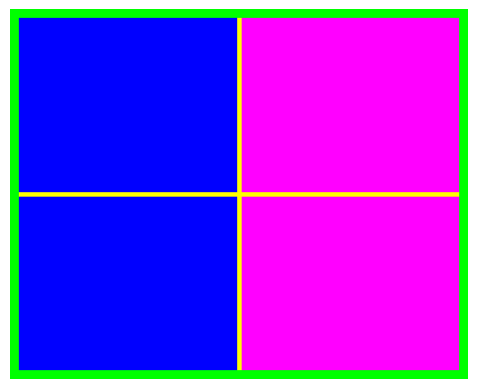

In [1]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Crear una imagen de 500x400 píxeles
height, width = 400, 500
image = np.zeros((height, width, 3), dtype=np.uint8)

# Pintar mitad azul y mitad magenta
image[:, :width//2] = (255, 0, 0)  # Azul en OpenCV (BGR)
image[:, width//2:] = (255, 0, 255)  # Magenta en OpenCV (BGR)

# Dibujar una cruz amarilla en el centro
center_x, center_y = width // 2, height // 2
cv2.line(image, (center_x, 0), (center_x, height), (0, 255, 255), 3)  # Línea vertical amarilla
cv2.line(image, (0, center_y), (width, center_y), (0, 255, 255), 3)  # Línea horizontal amarilla

# Agregar un borde verde
image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0, 255, 0))

# Mostrar la imagen creada
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

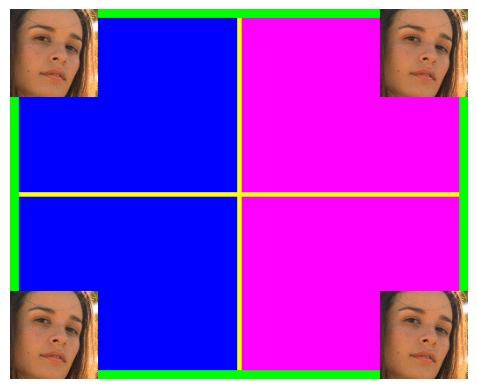

In [3]:
# Cargar una imagen de una persona
person_image = cv2.imread('/content/cara.jpg')  # Reemplaza con la ruta de tu imagen
gray_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2GRAY)

# Cargar el clasificador de Haar para detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detectar la cara en la imagen
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Verificar si se detectó al menos una cara
if len(faces) > 0:
    x, y, w, h = faces[0]  # Tomamos la primera cara detectada
    head_region = person_image[y:y+h, x:x+w]

    # Redimensionar la región de la cabeza para que se ajuste a las esquinas
    head_region_resized = cv2.resize(head_region, (100, 100))

    # Colocar la región de la cabeza en las cuatro esquinas de la imagen
    result_image = image.copy()
    result_image[:100, :100] = head_region_resized  # Esquina superior izquierda
    result_image[:100, -100:] = head_region_resized  # Esquina superior derecha
    result_image[-100:, :100] = head_region_resized  # Esquina inferior izquierda
    result_image[-100:, -100:] = head_region_resized  # Esquina inferior derecha

    # Mostrar la imagen final
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("No se detectó ninguna cara en la imagen.")

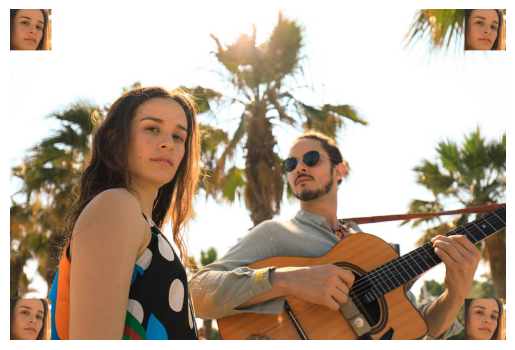

In [4]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Cargar una imagen de una persona
person_image = cv2.imread('/content/cara.jpg')  # Reemplaza con la ruta de tu imagen
gray_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2GRAY)

# Cargar el clasificador de Haar para detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detectar la cara en la imagen
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Verificar si se detectó al menos una cara
if len(faces) > 0:
    x, y, w, h = faces[0]  # Tomamos la primera cara detectada
    head_region = person_image[y:y+h, x:x+w]

    # Redimensionar la región de la cabeza para que se ajuste a las esquinas
    head_region_resized = cv2.resize(head_region, (100, 100))

    # Colocar la región de la cabeza en las cuatro esquinas de la imagen
    result_image = person_image.copy()
    result_image[:100, :100] = head_region_resized  # Esquina superior izquierda
    result_image[:100, -100:] = head_region_resized  # Esquina superior derecha
    result_image[-100:, :100] = head_region_resized  # Esquina inferior izquierda
    result_image[-100:, -100:] = head_region_resized  # Esquina inferior derecha

    # Mostrar la imagen final
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("No se detectó ninguna cara en la imagen.")

**Reconocimiento de Imágenes con IA: Convoluciones y Filtros**

En el reconocimiento de imágenes con IA, se utilizan convoluciones y filtros para extraer características esenciales de las imágenes, como bordes, texturas y patrones. Estos componentes son fundamentales para construir modelos capaces de identificar y clasificar objetos en las imágenes.

# **Convoluciones**
Una convolución es una operación matemática que se aplica en redes neuronales convolucionales (CNN). Consiste en hacer pasar un "filtro" o "kernel" (matriz pequeña) sobre una imagen para detectar ciertas características visuales.

* **Kernel/Filtro :** Es una pequeña matriz (como 3x3 o 5x5) que se mueve sobre la imagen y realiza operaciones de multiplicación y suma con los píxeles de la imagen.
* **Resultado :** A medida que el filtro pasa por cada parte de la imagen, genera un "mapa de características" que resalta ciertas características, como bordes verticales, horizontales, texturas y cambios de color.

In [5]:
# Cargar la imagen
person_image = cv2.imread('/content/cara.jpg')

# Convertir a escala de grises para ver mejor el efecto de los filtros
gray_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2GRAY)


In [6]:
# Definir los filtros (kernels) como matrices de NumPy

# 1. Filtro de Extensión de punto 3x3
extension_kernel = np.array([
    [-0.627, 0.352, -0.627],
    [0.352, 2.923, 0.352],
    [-0.627, 0.352, -0.627]
])


In [7]:
# 2. Filtro de Suavizado 5x5 (Filtro de paso bajo)
smooth_kernel = np.array([
    [1, 1, 1, 1, 1],
    [1, 4, 4, 4, 1],
    [1, 4, 12, 4, 1],
    [1, 4, 4, 4, 1],
    [1, 1, 1, 1, 1]
], dtype=np.float32) / 40  # Normalizar el filtro dividiendo por la suma total


In [8]:
# 3. Filtro de Nitidez 5x5 (Filtro de paso alto)
sharp_kernel = np.array([
    [-1, -3, -4, -3, -1],
    [-3, 0, 6, 0, -3],
    [-4, 6, 21, 6, -4],
    [-3, 0, 6, 0, -3],
    [-1, -3, -4, -3, -1]
])

In [9]:
# 4. Filtro de Aumentar nitidez II 3x3
sharpening_kernel_2 = np.array([
    [-0.25, -0.25, -0.25],
    [-0.25, 3, -0.25],
    [-0.25, -0.25, -0.25]
])

In [10]:
# Aplicar cada filtro usando la función cv2.filter2D
filtered_extension = cv2.filter2D(gray_image, -1, extension_kernel)
filtered_smooth = cv2.filter2D(gray_image, -1, smooth_kernel)
filtered_sharp = cv2.filter2D(gray_image, -1, sharp_kernel)
filtered_sharpening_2 = cv2.filter2D(gray_image, -1, sharpening_kernel_2)

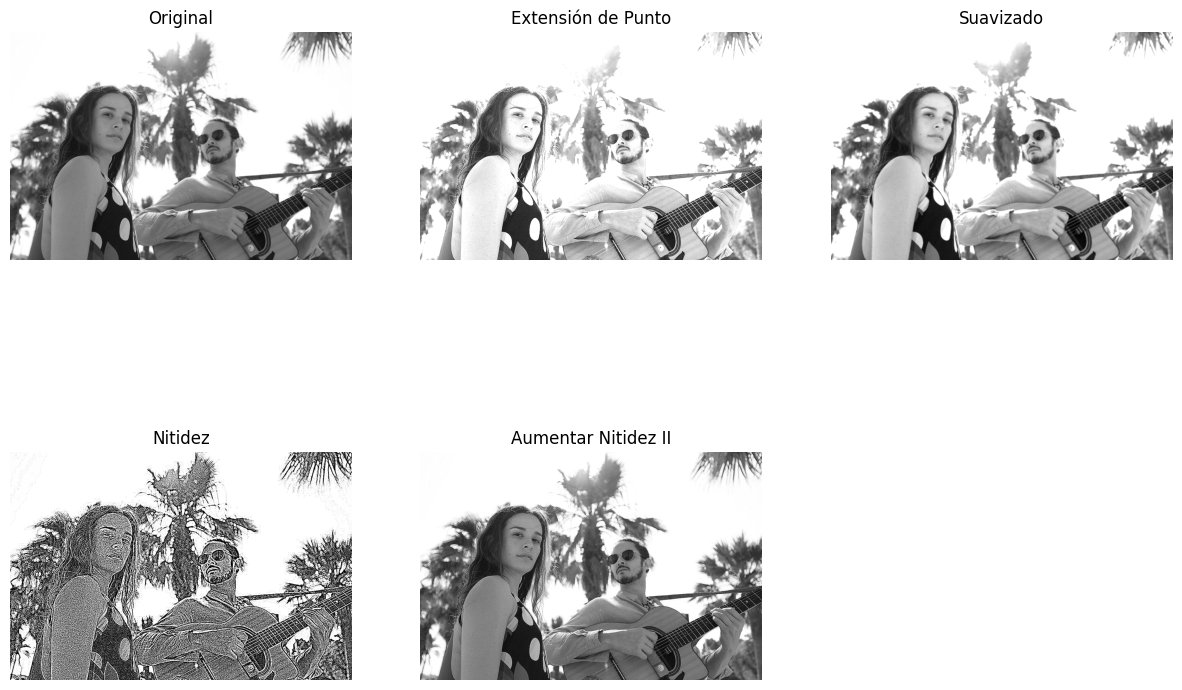

In [11]:
# Mostrar la imagen original y las filtradas
titles = ['Original', 'Extensión de Punto', 'Suavizado', 'Nitidez', 'Aumentar Nitidez II']
images = [gray_image, filtered_extension, filtered_smooth, filtered_sharp, filtered_sharpening_2]

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

**Video Explicativo**

https://www.youtube.com/watch?v=AwTH_0yW9_I&t=630s&ab_channel=RingaTech